In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/saprativasarkar/Desktop/ML/10_Python_and_OOPS/11_statistics/dataset/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Survived

In [7]:
# Survived is discrete feature
# majority of people does not survived
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

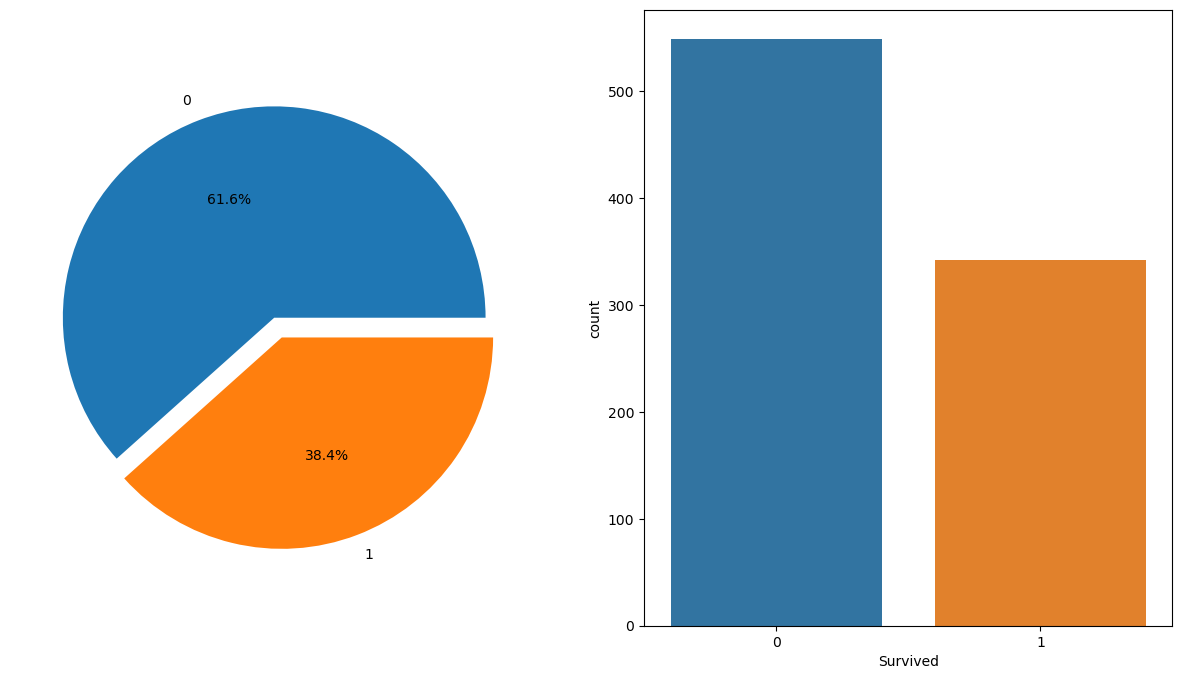

In [34]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.pie(x=df['Survived'].value_counts(),labels=[0,1],explode=[0,0.1], autopct = "%1.1f%%")
plt.subplot(1,2,2)
sns.countplot(data=df,x='Survived')
plt.show()

## Sex

In [31]:
pivot = pd.crosstab(index=df["Survived"],columns=df["Sex"])
pivot

Sex,female,male
Survived,,
0,81,468
1,233,109


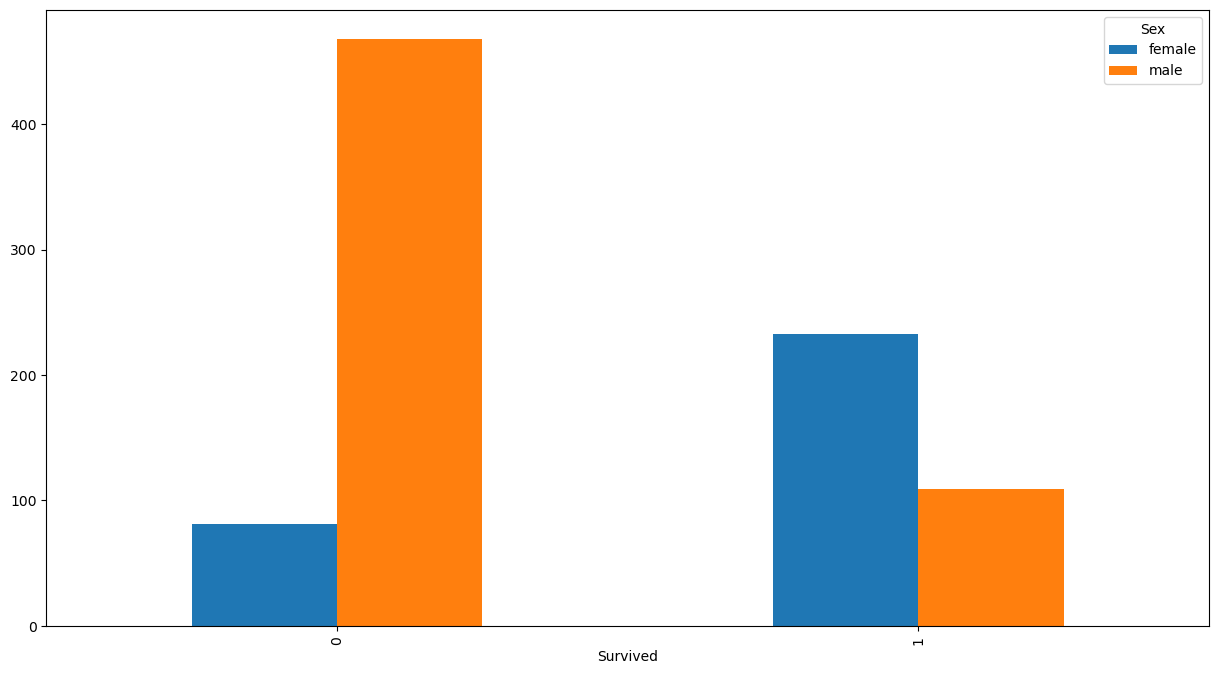

In [41]:
pivot.plot(kind='bar',figsize=(15,8))
plt.show()
# male have less survival than female

## P Class

In [71]:
# discrete
pivot = pd.crosstab(index=df["Pclass"],columns=df["Survived"])
pivot

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


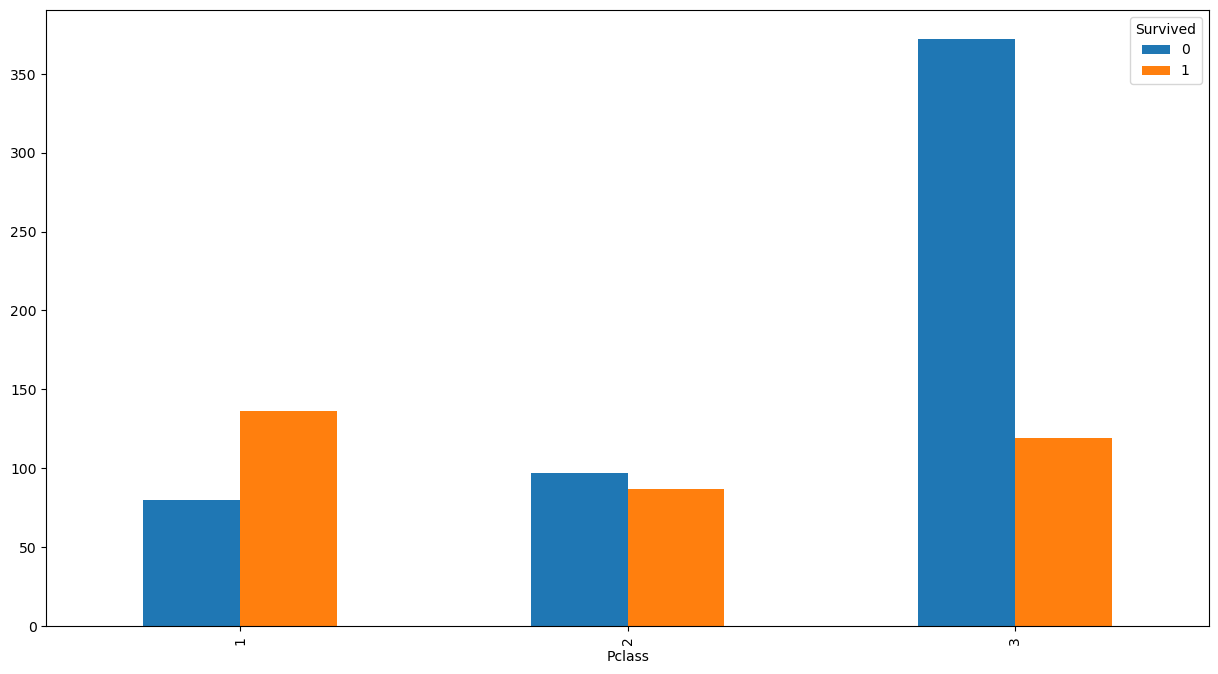

In [55]:
pivot.plot(kind='bar',figsize=(15,8))
plt.show()
# class 1 more survived
# class 2 less

In [58]:
pivot = pd.crosstab(index=[df['Sex'],df['Survived']],columns=df['Pclass'])
pivot

Pclass            1   2    3
Sex    Survived             
female 0          3   6   72
       1         91  70   72
male   0         77  91  300
       1         45  17   47

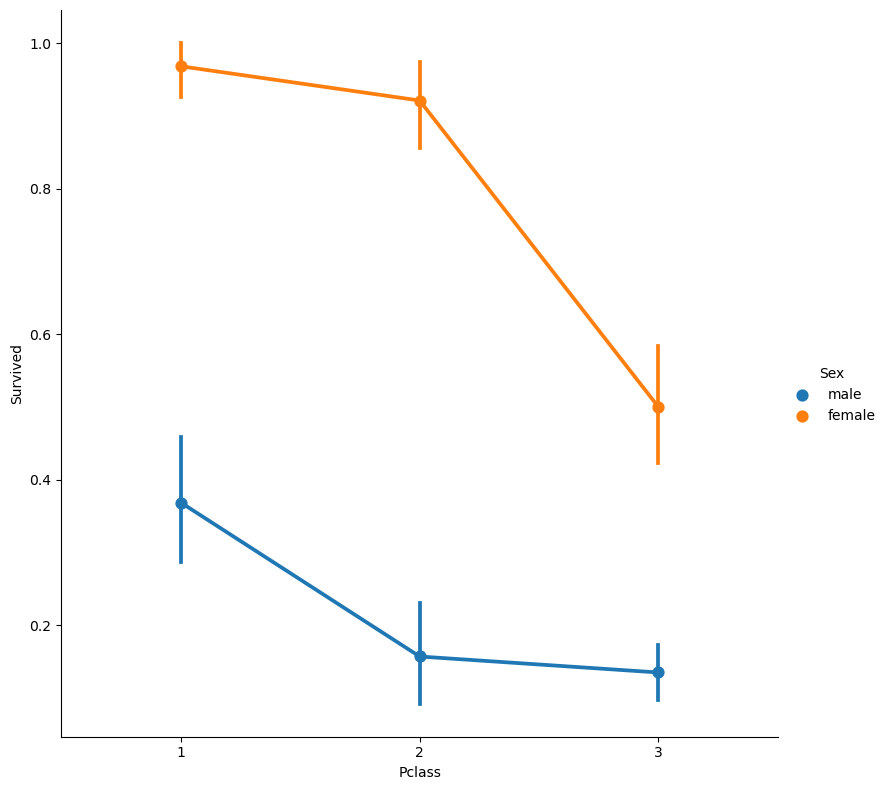

In [70]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='point',height=8,aspect=1)
plt.show()
# almost 100% female from pclass 1 has survived

## Age

In [74]:
# continuous
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

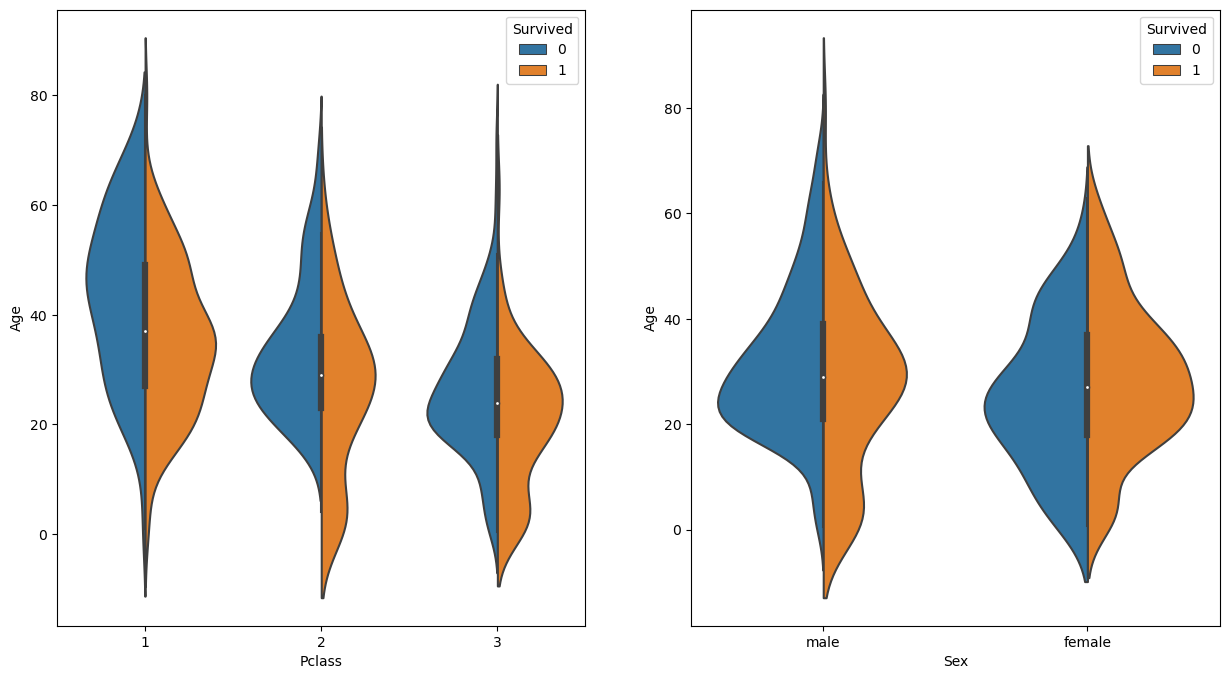

In [83]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.violinplot(data=df,x="Pclass",y="Age", hue = 'Survived',split=True)
plt.subplot(1,2,2)
sns.violinplot(data=df,x="Sex",y="Age",hue="Survived",split=True)
plt.show()

In [87]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
pd.crosstab([df['Pclass'], df['AgeGroup']], df['Survived'])

Survived          0   1
Pclass AgeGroup        
1      0–10       1   2
       11–20      3  15
       21–30     11  29
       31–40     12  37
       41–50     16  21
       51–60     10  15
       61–70      9   2
       71–80      2   1
2      0–10       0  17
       11–20      9   9
       21–30     36  25
       31–40     24  19
       41–50      9  10
       51–60     10   2
       61–70      2   1
3      0–10      25  19
       11–20     59  20
       21–30     99  30
       31–40     50  13
       41–50     28   2
       51–60      5   0
       61–70      2   1
       71–80      2   0

In [88]:
# In 1st class, a good number of older people survived.
# In 3rd class, most passengers were younger, but a majority died.
# The distribution is denser at younger ages for 2nd and 3rd classes.
# Surviving in 1st class seems to be more likely for a broader age group.

In [89]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
pd.crosstab([df['Sex'], df['AgeGroup']], df['Survived'])

Survived           0   1
Sex    AgeGroup         
female 0-10       12  19
       11-20      12  34
       21-30      20  61
       31-40       9  46
       41-50      10  21
       51-60       1  13
       61-70       0   3
male   0-10       14  19
       11-20      59  10
       21-30     126  23
       31-40      77  23
       41-50      43  12
       51-60      24   4
       61-70      13   1
       71-80       4   1

In [ ]:
pd.crosstab([df['Pclass'], df['AgeGroup']], df['Survived'], normalize='index') * 100